# =============================================================
# Image classification using CNN  (Convolutional Neural Net)
## This code uses CNN to classify 3000 images consisting of cats, dogs and pandas into correct labels. 
## Steps are as follows
### 1. Preprocess images
### 2. First divides input set into training set and test set
### 3.  Define CNN model
### 4. Train CNN model with training set
### 5.   Test CNN model with test set
### 6.  Plot evaluation metrics
# =============================================================

###         Declare namespaces for packages used in code

In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from greenheritagellc.preprocessing import Preprocessor
from greenheritagellc.preprocessing import ImageToArrayPreprocessor
from greenheritagellc.datasets import DatasetLoader
from greenheritagellc.nn.conv import ShallowNet
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.
C:\Anaconda3\envs\p37-env\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\envs\p37-env\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\envs\p37-env\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\envs\p37-env\lib\site-packages\tensorflow\python\framework\dtype

### Define inputs

In [2]:
dataset_path = ".\\datasets\\animals"

### Grab the list of images that we'll be describing

In [3]:
print("[INFO] loading images...")
imagePaths = list(paths.list_images(dataset_path))


[INFO] loading images...


### Initialize the image resize preprocessor and imageto numpyarray preprocessor


In [4]:
pp = Preprocessor(32, 32)
imagetoarraypp = ImageToArrayPreprocessor()




### Load the dataset from disk and reshape the data matrix

In [5]:
dl = DatasetLoader(preprocessors=[pp, imagetoarraypp])
(data, labels) = dl.load(imagePaths, verbose=500)
data = data.astype("float") / 255.0
print(data.shape)
print(labels.shape)

imagepath: .\datasets\animals\cats\cats_00001.jpg
label before: ['.', 'datasets', 'animals', 'cats', 'cats_00001.jpg']
label after: cats
[INFO] processed 500/3000
[INFO] processed 1000/3000
[INFO] processed 1500/3000
[INFO] processed 2000/3000
[INFO] processed 2500/3000
[INFO] processed 3000/3000
(3000, 32, 32, 3)
(3000,)


### Show some information on memory consumption of the images

In [6]:
print("[INFO] features matrix: {:.1f}MB".format(
	data.nbytes / (1024 * 1024.0)))

[INFO] features matrix: 70.3MB


### Partition the data into training and testing splits using 75% of the data for training and the remaining 25% for testing

In [7]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)
print(trainY[0:9])

(2250, 32, 32, 3)
(750, 32, 32, 3)
(2250,)
(750,)
['panda' 'cats' 'dogs' 'dogs' 'cats' 'panda' 'cats' 'cats' 'panda']


### convert the labels from integers to vectors

In [8]:
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)
print(trainY[0:9])
print(trainY.shape)
print(testY.shape)

[[0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [1 0 0]
 [0 0 1]]
(2250, 3)
(750, 3)


###  initialize the optimizer and model

In [9]:

print("[INFO] compiling model...")
opt = SGD(lr=0.005)
model = ShallowNet.build(width=32, height=32, depth=3, classes=3)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


W0829 21:02:15.163295 15704 deprecation_wrapper.py:119] From C:\Anaconda3\envs\p37-env\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0829 21:02:15.186226 15704 deprecation_wrapper.py:119] From C:\Anaconda3\envs\p37-env\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 21:02:15.220135 15704 deprecation_wrapper.py:119] From C:\Anaconda3\envs\p37-env\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0829 21:02:15.611761 15704 deprecation_wrapper.py:119] From C:\Anaconda3\envs\p37-env\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0829 21:02:15.678112 15704 deprecation_wrapper.py:119] From C:\Anaconda3\en

### train the network

In [10]:

print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	batch_size=32, epochs=100, verbose=1)

[INFO] training network...


W0829 21:02:16.637369 15704 deprecation.py:323] From C:\Anaconda3\envs\p37-env\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0829 21:02:17.371463 15704 deprecation_wrapper.py:119] From C:\Anaconda3\envs\p37-env\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 2250 samples, validate on 750 samples
Epoch 1/100
2250/2250 [==============================] - 9s 4ms/step - loss: 1.0398 - acc: 0.4529 - val_loss: 0.9563 - val_acc: 0.5147 5s - loss: 1.0921 - acc: 0.38 - ETA: 5s - - ETA: 1s - loss: 1.0475 -
Epoch 2/100
2250/2250 [==============================] - 4s 2ms/step - loss: 0.9830 - acc: 0.5271 - val_loss: 1.4606 - val_acc: 0.4080
Epoch 3/100
2250/2250 [==============================] - 4s 2ms/step - loss: 1.1089 - acc: 0.5120 - val_loss: 2.6407 - val_acc: 0.3200
Epoch 4/100
2250/2250 [==============================] - 5s 2ms/step - loss: 1.1859 - acc: 0.5231 - val_loss: 0.8907 - val_acc: 0.5520
Epoch 5/100
2250/2250 [==============================] - 3s 1ms/step - loss: 1.1333 - acc: 0.5271 - val_loss: 1.1827 - val_acc: 0.5507
Epoch 6/100
2250/2250 [==============================] - 3s 1ms/step - loss: 3.7242 - acc: 0.4498 - val_loss: 4.5606 - val_acc: 0.3587
Epoch 7/100
2250/2250 [==============================] - 3s 1ms/step - los

Epoch 60/100
2250/2250 [==============================] - 1s 536us/step - loss: 7.3436 - acc: 0.5311 - val_loss: 8.2107 - val_acc: 0.4773
Epoch 61/100
2250/2250 [==============================] - 1s 527us/step - loss: 7.2899 - acc: 0.5302 - val_loss: 7.2374 - val_acc: 0.5347
Epoch 62/100
2250/2250 [==============================] - 1s 532us/step - loss: 7.4384 - acc: 0.5262 - val_loss: 7.0903 - val_acc: 0.5480
Epoch 63/100
2250/2250 [==============================] - 1s 586us/step - loss: 7.2169 - acc: 0.5431 - val_loss: 7.2449 - val_acc: 0.5400
Epoch 64/100
2250/2250 [==============================] - 1s 599us/step - loss: 7.1586 - acc: 0.5427 - val_loss: 7.4798 - val_acc: 0.5200
Epoch 65/100
2250/2250 [==============================] - 2s 672us/step - loss: 7.2802 - acc: 0.5324 - val_loss: 8.1151 - val_acc: 0.4827
Epoch 66/100
2250/2250 [==============================] - 1s 638us/step - loss: 7.1219 - acc: 0.5493 - val_loss: 7.2188 - val_acc: 0.5400
Epoch 67/100
2250/2250 [==========

### evaluate the network

In [11]:

# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=["cat", "dog", "panda"]))

[INFO] evaluating network...
              precision    recall  f1-score   support

         cat       0.47      0.55      0.51       262
         dog       0.00      0.00      0.00       249
       panda       0.49      0.91      0.64       239

    accuracy                           0.48       750
   macro avg       0.32      0.49      0.38       750
weighted avg       0.32      0.48      0.38       750



C:\Anaconda3\envs\p37-env\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### plot the training loss and accuracy

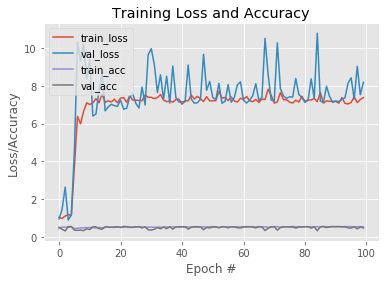

In [12]:

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()